In [31]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
from resnet_FashionMnist import resnet_FashionMnist

In [32]:
resnet_fashionmnist = resnet_FashionMnist()

In [33]:
with torch.cuda.device(0):
    net = resnet_fashionmnist
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    if net == resnet_fashionmnist:
        print(torch.backends.mps.is_built())
        print(torch.backends.mps.is_available())
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Sequential(
  11.18 M, 100.000% Params, 1.74 GMac, 99.820% MACs, 
  (0): Sequential(
    3.33 k, 0.030% Params, 43.35 MMac, 2.482% MACs, 
    (0): Conv2d(3.2 k, 0.029% Params, 40.14 MMac, 2.298% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(128, 0.001% Params, 1.61 MMac, 0.092% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(0, 0.000% Params, 802.82 KMac, 0.046% MACs, )
    (3): MaxPool2d(0, 0.000% Params, 802.82 KMac, 0.046% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    148.22 k, 1.326% Params, 464.83 MMac, 26.611% MACs, 
    (0): Residual(
      74.11 k, 0.663% Params, 232.42 MMac, 13.306% MACs, 
      (conv1): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(36.93 k, 0.330% Params, 115.81 MMac, 6.630% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [34]:
# find the path
path = os.getcwd()
print('This code is in: ', path)

# find the train_data folder
train_data_path = os.path.join(path, 'Resnet_train_data')
print('The training data are saved in: ', train_data_path)

# find all the folders in the train_data folder
train_data_folders = os.listdir(train_data_path)
print('The folders in the training data folder are: ', train_data_folders)

This code is in:  /home/yj/FinalThesis/GreenAI/GPU/universal
The training data are saved in:  /home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data
The folders in the training data folder are:  ['round3', 'round7', 'round8', 'round2', 'round5', 'round10', 'round4', 'round1', 'round6', 'round9']


In [35]:
subfolder = []
for round in train_data_folders:
    subfolder.append(os.path.join(train_data_path, round))
print('The subfolders are: ', subfolder)

The subfolders are:  ['/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round3', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round7', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round8', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round2', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round5', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round10', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round4', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round1', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round6', '/home/yj/FinalThesis/GreenAI/GPU/universal/Resnet_train_data/round9']


In [36]:
for i in subfolder:
    filesi = os.listdir(i)
    print('The files in the subfolder are: ', filesi)

The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.npy', 'TTrainAccLoss.npy', 'TrainTime.npy', 'TrainLoss.npy', 'Time_AllEpochs.npy', 'TrainAcc.npy']
The files in the subfolder are:  ['TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TestAcc.n

In [37]:
Round = 10
Epoch = 10

In [38]:
Time_AllRound = np.zeros((Round,Epoch,6))
Energy_AllRound = np.zeros((Round,Epoch,1), dtype=object)
TrainTime_AllRound = np.zeros((Round,Epoch,1))
TimeEpoch_AllRound = np.zeros((Round,Epoch,1))
TrainLoss_AllRound = np.zeros((Round,Epoch,1))
TrainAcc_AllRound = np.zeros((Round,Epoch,1))
TestAcc_AllRound = np.zeros((Round,Epoch,1))
TTrainEval_AllRound = np.zeros((Round,Epoch,1))

In [39]:
for round in range(len(subfolder)):
    Time_AllEpochsi = np.load(os.path.join(subfolder[round], 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energy_AllEpochsi = np.load(os.path.join(subfolder[round], 'Energy_AllEpochs.npy'), allow_pickle=True)
    TTrainEvali = np.load(os.path.join(subfolder[round], 'TTrainAccLoss.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainTimei = np.load(os.path.join(subfolder[round], 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    TimeEpochi = np.load(os.path.join(subfolder[round], 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(subfolder[round], 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(subfolder[round], 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(subfolder[round], 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)
    Time_AllRound[round,:,:] = Time_AllEpochsi
    Energy_AllRound[round,:,:] = Energy_AllEpochsi
    TrainTime_AllRound[round,:,:] = TrainTimei
    TimeEpoch_AllRound[round,:,:] = TimeEpochi
    TrainLoss_AllRound[round,:,:] = TrainLossi
    TrainAcc_AllRound[round,:,:] = TrainAcci
    TestAcc_AllRound[round,:,:] = TestAcci
    TTrainEval_AllRound[round,:,:] = TTrainEvali

#### Time_AllRound

In [40]:
print(Time_AllRound.shape)

(10, 10, 6)


对10个epoch的数据要进行平均

In [41]:
# sum the Time_AllRound according to the epochs
Time_AllRoundSum = np.sum(Time_AllRound, axis=0)
# print(Time_AllRoundSum.shape)
# print(Time_AllRoundSum)
print('*'*50)
# each point divide by the number of rounds
Time_AllRoundAvg = Time_AllRoundSum/Round
print(Time_AllRoundAvg.shape)
print(Time_AllRoundAvg)

**************************************************
(10, 6)
[[ 2.01223738 41.79472835  0.11725607 86.3505275   0.38247271  7.54496439]
 [ 2.0107497  41.85051649  0.11599994 86.4527442   0.38320735  7.55303135]
 [ 2.01345923 41.85422752  0.11390295 86.46478746  0.38650703  7.54542007]
 [ 2.01141107 41.85483227  0.10956388 86.40544589  0.38735418  7.540465  ]
 [ 2.01126158 41.84707174  0.10701005 86.45764866  0.38382497  7.54773338]
 [ 2.01463556 41.84709904  0.11204348 86.5088084   0.38360276  7.54834554]
 [ 2.01390777 41.85712171  0.10989845 86.51069286  0.38500786  7.54715805]
 [ 2.01460557 41.84786382  0.10976269 86.3968668   0.38822236  7.53995335]
 [ 2.01068566 41.84332376  0.10759571 86.34352527  0.38606234  7.54348824]
 [ 2.01030219 41.84909718  0.11071305 86.42234516  0.38559215  7.54397485]]


In [42]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllRoundAvg[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllRoundAvg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllRoundAvg[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllRoundAvg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllRoundAvg[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllRoundAvg[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.01223738 2.0107497  2.01345923 2.01141107 2.01126158 2.01463556
 2.01390777 2.01460557 2.01068566 2.01030219] 
 The Forward time of all epoch: 
 [41.79472835 41.85051649 41.85422752 41.85483227 41.84707174 41.84709904
 41.85712171 41.84786382 41.84332376 41.84909718] 
 The Calculate Loss time of all epoch: 
 [0.11725607 0.11599994 0.11390295 0.10956388 0.10701005 0.11204348
 0.10989845 0.10976269 0.10759571 0.11071305] 
 The Backward time of all epoch: 
 [86.3505275  86.4527442  86.46478746 86.40544589 86.45764866 86.5088084
 86.51069286 86.3968668  86.34352527 86.42234516] 
 The Optimize time of all epoch: 
 [0.38247271 0.38320735 0.38650703 0.38735418 0.38382497 0.38360276
 0.38500786 0.38822236 0.38606234 0.38559215] 
 The Test time of all epoch: 
 [7.54496439 7.55303135 7.54542007 7.540465   7.54773338 7.54834554
 7.54715805 7.53995335 7.54348824 7.54397485]


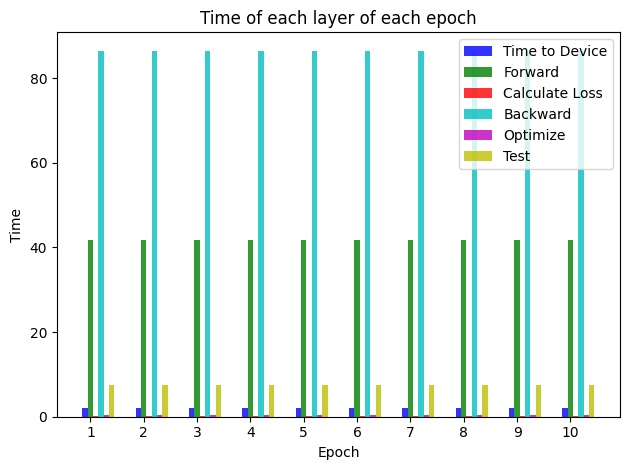

In [43]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllRoundAvg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllRoundAvg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllRoundAvg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllRoundAvg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllRoundAvg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllRoundAvg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

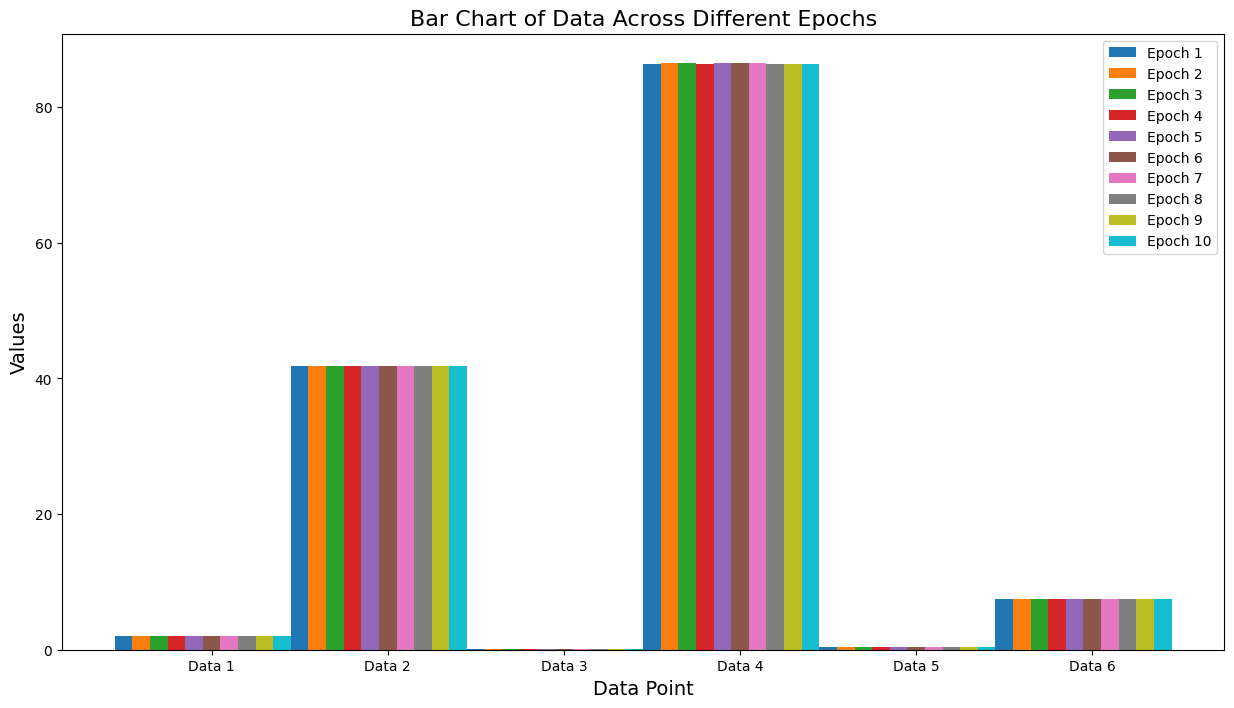

In [44]:
# Number of epochs
epochs = Time_AllRoundAvg.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllRoundAvg.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllRoundAvg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllRoundAvg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

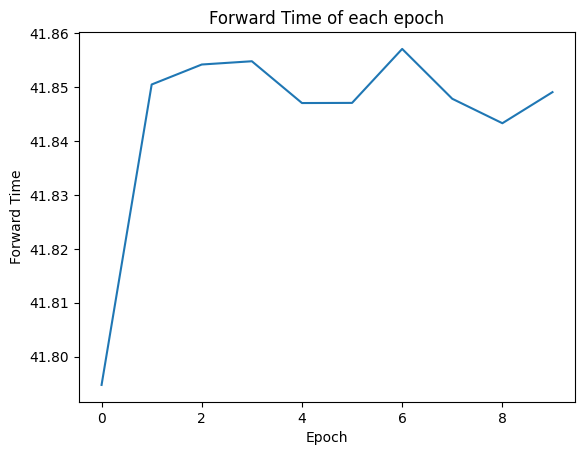

In [45]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

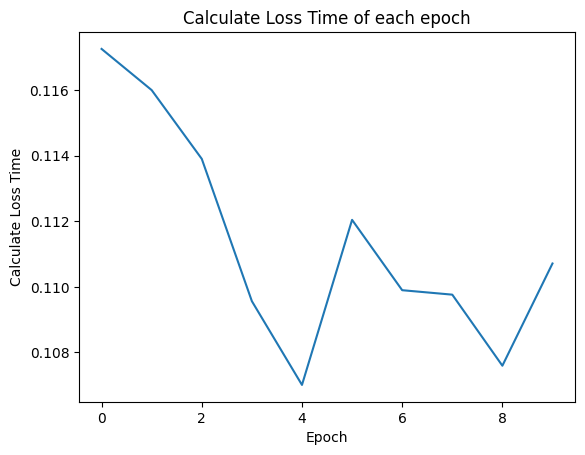

In [46]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

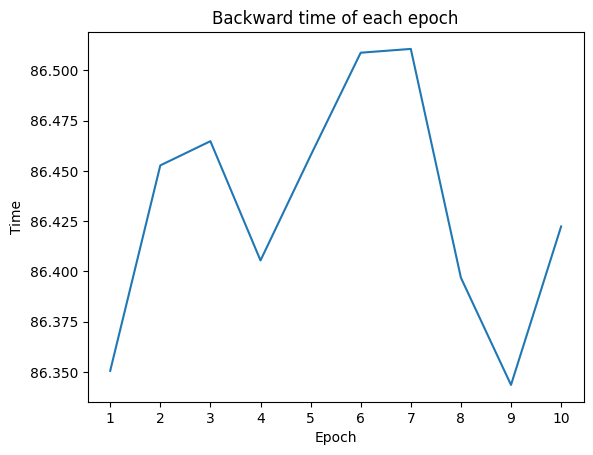

In [47]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

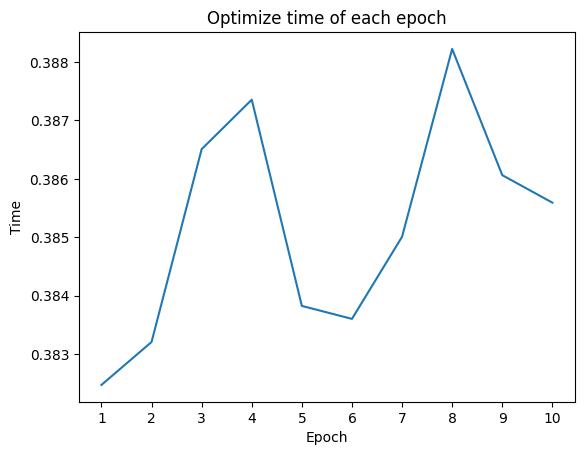

In [48]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

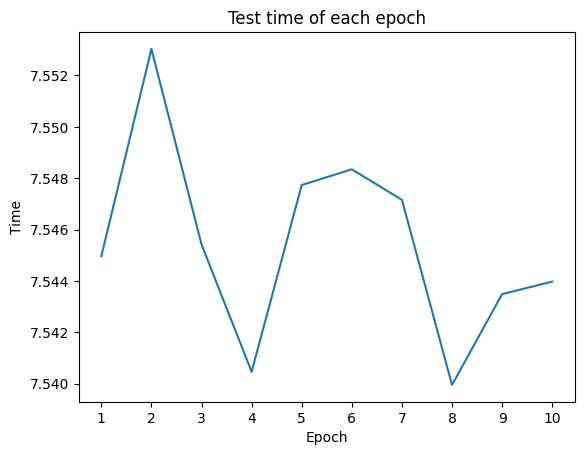

In [49]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllRound 

In [50]:
print(Energy_AllRound.shape)
# create a ndarray to store the average running time of each epoch
TimeRecorded_Total = np.zeros((Round,Epoch,1))
EnergyRecorded = np.zeros((Round,Epoch,1))
for i in range(len(Energy_AllRound)):
    # print('In round ', i+1, ': \n')
    for j in range(len(Energy_AllRound[i])):
        # print('Epoch ', j+1, 'The total recorded time is: ', len(Energy_AllRound[i][j][0]))
        TimeRecorded_Total[i,j,0] = len(Energy_AllRound[i][j][0])
        EnergyRecorded[i,j,0] = np.sum(Energy_AllRound[i][j][0])

(10, 10, 1)


In [51]:
print(TimeRecorded_Total.shape)
# print(TimeRecorded_Total)
TimeRecorded_Avg = np.sum(TimeRecorded_Total, axis=0)/Round
print(TimeRecorded_Avg.shape)
print(TimeRecorded_Avg.T)

print(EnergyRecorded.shape)
# print(EnergyRecorded)
EnergyRecorded_Avg = np.sum(EnergyRecorded, axis=0)/Round
print(EnergyRecorded_Avg.shape)
print(EnergyRecorded_Avg.T)

(10, 10, 1)
(10, 1)
[[141.5 141.8 141.9 141.8 141.9 142.  141.9 141.7 141.5 141.9]]
(10, 10, 1)
(10, 1)
[[11260.706 11294.691 11299.794 11293.733 11299.626 11308.265 11301.436
  11280.706 11269.776 11300.661]]


In [52]:
# calculate the total energy of each round
Energy_Total = np.sum(EnergyRecorded_Avg, axis=0)
print('The average total energy consumption of each round running is: ', Energy_Total, 'J')

# calculate the total time of each round
Time_Total = np.sum(TimeRecorded_Avg, axis=0)
print('The average total time of each round running is: ', Time_Total, 's')

The average total energy consumption of each round running is:  [112909.394] J
The average total time of each round running is:  [1417.9] s


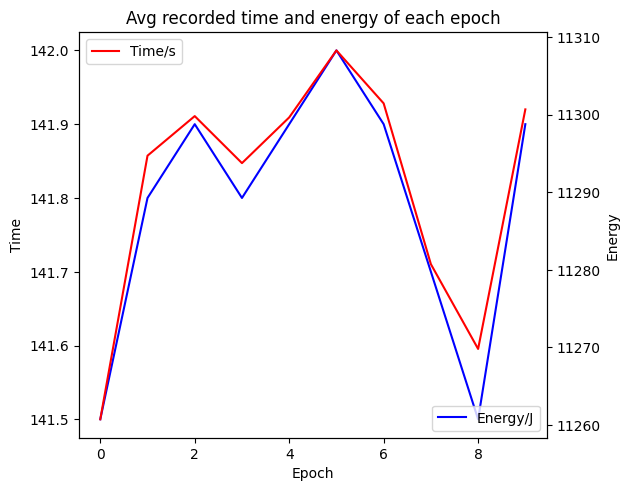

In [53]:
# plot the avg recorded time of each epoch and energy using matplotlib with line in one figure, the left axis is the time and the right axis is the energy
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.plot(TimeRecorded_Avg, color='b')
plt.legend(['Energy/J'], loc='lower right')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
ax2.plot(EnergyRecorded_Avg, color='r')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.title('Avg recorded time and energy of each epoch')
plt.legend(['Time/s'], loc='upper left')
plt.show()

#### TimeEpoch_AllRound

In [54]:
print(TimeEpoch_AllRound.shape)
# print(TimeEpoch_AllRound)

TimeEpoch_Round = np.zeros((Round,Epoch,1))
for i in range(TimeEpoch_AllRound.shape[0]):
    TimeEpoch_Roundi = TimeEpoch_AllRound[i,:,:]
    # print(TimeEpoch_Roundi.shape)
    time_temp = np.zeros((TimeEpoch_Roundi.shape[0],1))
    for j in range(TimeEpoch_Roundi.shape[0]):
        if j == 0:
            time_temp[j,0] = TimeEpoch_Roundi[j,0]
        else:
            time_temp[j,0] = TimeEpoch_Roundi[j,0] - TimeEpoch_Roundi[j-1,0]
    TimeEpoch_Round[i,:,:] = time_temp
    
print(TimeEpoch_Round.shape)
# print(TimeEpoch_Round)
TimeEpoch_RoundAvg = np.sum(TimeEpoch_Round, axis=0)/Round
print(TimeEpoch_RoundAvg.shape)
print('The average time of each epoch is: \n', TimeEpoch_RoundAvg.T)

(10, 10, 1)
(10, 10, 1)
(10, 1)
The average time of each epoch is: 
 [[141.10499601 141.27260706 141.2870291  141.21769879 141.26175737
  141.3263438  141.32788537 141.21734517 141.14546041 141.22771721]]


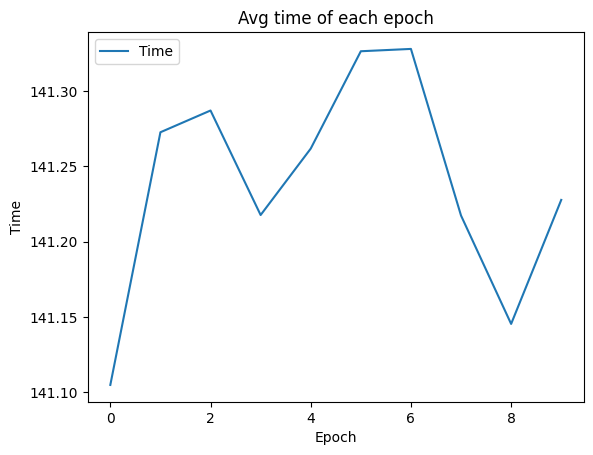

In [55]:
# plot the avg time of each epoch using matplotlib with line in one figure
plt.plot(TimeEpoch_RoundAvg)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Avg time of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### train loss, acc and test acc

In [56]:
print(TrainLoss_AllRound.shape)
print(TrainAcc_AllRound.shape)
print(TestAcc_AllRound.shape)

(10, 10, 1)
(10, 10, 1)
(10, 10, 1)


In [57]:
# get the average train loss of each epoch
TrainLoss_RoundAvg = np.sum(TrainLoss_AllRound, axis=0)/Round
print(TrainLoss_RoundAvg.shape)
print('The avg train loss of each epoch is: \n', TrainLoss_RoundAvg.T)

# get the average train accuracy of each epoch
TrainAcc_RoundAvg = np.sum(TrainAcc_AllRound, axis=0)/Round
print(TrainAcc_RoundAvg.shape)
print('The avg train acc of each epoch is: \n', TrainAcc_RoundAvg.T)

# get the average test accuracy of each epoch
TestAcc_RoundAvg = np.sum(TestAcc_AllRound, axis=0)/Round
print(TestAcc_RoundAvg.shape)
print('The avg test acc of each epoch is: \n',TestAcc_RoundAvg.T)

(10, 1)
The avg train loss of each epoch is: 
 [[0.58005707 0.33249207 0.27139614 0.23226969 0.20124498 0.17367193
  0.14833489 0.12447765 0.10129288 0.0802478 ]]
(10, 1)
The avg train acc of each epoch is: 
 [[0.79765333 0.87988667 0.90262667 0.91693    0.92858333 0.93889833
  0.94837333 0.95749    0.96643667 0.97425333]]
(10, 1)
The avg test acc of each epoch is: 
 [[0.81303 0.84403 0.86009 0.87911 0.88294 0.89196 0.87807 0.88883 0.88782
  0.89848]]


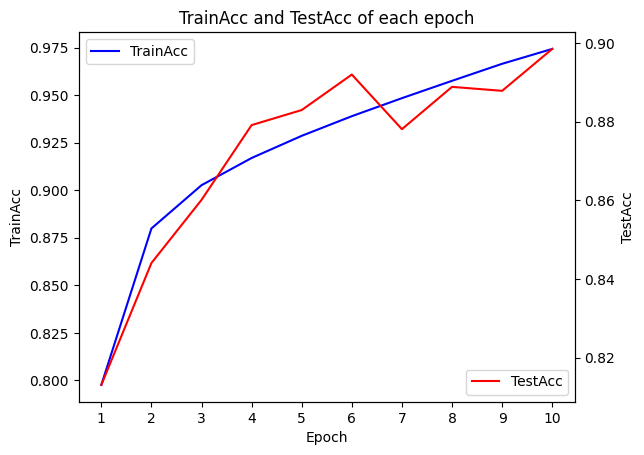

In [58]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc_RoundAvg, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc_RoundAvg, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
